# 단축키

- 셀간 이동 : 위 아래 화살표
- 편집 모드/명령 모드 전환 : Enter(편집 프롬프트), Esc(프롬프트 사라짐)
- 실행 : 특수키(Shift/Alt/Ctrl) + Enter 
- 셀 지우기 : 명령모드에서 x
- 셀 만들기 : 명령모드에서 b(아래에 만들어짐 below)
- 추가 코드셀/마크다운셀 : y, m(markdown), 123456

## 개발팁
- 자동완성, 함수 검색시 : tab
- 함수 도움말 : shift+tab
- 함수 도움말을 하단 탭으로 : np.arange?
- 커맨드 명령 : !명령, 예) !dir, !pip install pandas

## 머신러닝 과정
1. 데이터획득
1. 정제(cleaning) : 누락데이터, 이상치 . 안하면 fit 불가능하거나 성능 하락
1. 데이터분석
   - corr() 상관관계로 fit이 가능한지 확인
   - 어떤 모델이 적절한가, 어떻게 모델링을 할까
1. 입력 X, 출력 Y 분리
1. 학습용/검증용 분리
1. 모델선택후 학습용 데이터로 학습
1. 성능 측정 (예측:결정계수, 분류:정확도)
1. 그래프 시각화, 모델이 어떻게 예측했는지를 분석

### 2가지 종류의 동물 분류(2진 분류) 를 구현
1. 개, 고양이  
1. 새
1. 특징 : 다리 수, 꼬리 유무 

### 선형 모델 : 선형 방정식으로 X, Y 관계를 표현하는 모델
- 선형 방정식이란 
#### 곱하기와 더하기만 사용하는 방정식
##### LinearRegression: Y = WX+b ,   X=(x_1,x_2,x_n), W=(w_1,w_2,w_n), n개의 특징
##### LogistRegression: Y = sigmoid(WX+b) , 
###### sigmoid=1/(1+exp(-z)) 출력 [0,1], 반올림 함수와 유사한 형태, exp:지수함수

In [4]:
import numpy as np
import tensorflow as tf

In [19]:
x = [[4,1],[4,1], [2,1]]
y = [0, 0, 1]

In [24]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [25]:
model = LinearRegression().fit(x,y)
model.coef_, model.intercept_, model.score(x,y)#결정 계수

(array([-0.5,  0. ]), 2.000000000000001, 1.0)

In [27]:
# Y = -0.5 * 다리갯수 + 0 * 꼬리 + 2
np.sum(model.coef_ * x, axis=1) + model.intercept_

array([0., 0., 1.])

In [23]:
model = LogisticRegression().fit(x,y)
model.coef_, model.intercept_, model.score(x,y)#정확도

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([[-0.4337917 ,  0.19915754]]), array([0.19915754]), 0.6666666666666666)

In [602]:
# LinearRegression 을 구현하자
w = tf.Variable([0.1, 0.1]) #2개의 초기값 
b = tf.Variable(0.0) 
#wx = tf.matmul(tf.reshape(w, [1,2]), tf.transpose(tf.cast(x, tf.float32), [1,0]))
h = tf.reduce_sum(w * tf.cast(x, tf.float32), axis=1) + b # 타입이 동일해야 연산가능
#h = tf.reduce_sum(w * tf.cast(x, tf.float32), axis=1) + b # 타입이 동일해야 연산가능
cost = tf.reduce_mean(tf.square(h - y)) # 오차 MSE : MeanSquareError
opt = tf.train.GradientDescentOptimizer(0.01)
trainOperation = opt.minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # 모든 Variable 초기화

In [603]:
for i in range(1000): # 에포크 
    _, _c, _h = sess.run([trainOperation, cost, h]) # fit
_c, _h

(0.0016424201, array([0.01831782, 0.01831782, 0.93476063], dtype=float32))

## Y = wx + b = h(x)    : h 는 함수 h(x) = wx + b
### h(x) = transpose(w==theta) . x  ( 중간 점은 행렬 곱셈 ) 

- 총 급여 계산하기
- 평일에 일하면 시급 1만원
- 주말에 일하면 시급 1만 2천원
- 3사람이 있습니다
##  [10, 5]   : 평일 10시간, 주말 5시간 일했습니다

In [609]:
x1 = [10, 5] 
x2 = [20, 10]
x3 = [30, 15]
X = [x1, x2, x3]
w = [10000, 12000]
x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)
X = np.array(X)
w = np.array(w)

## 위 세사람의 총 급여를 구하세요
#### 총 급여 = 시급(theta) * 일한 시간(x)

In [612]:
np.sum(w * X, axis=1)

array([160000, 320000, 480000])

In [613]:
w.shape, X.shape

((2,), (3, 2))

In [618]:
np.matmul(X, w)

array([160000, 320000, 480000])

In [619]:
np.matmul(w, np.transpose(X, [1,0]))

array([160000, 320000, 480000])

In [622]:
X

array([[10,  5],
       [20, 10],
       [30, 15]])

In [623]:
np.transpose(X, [1,0]) # 원래 [0, 1] 축인데 그것을 [1, 0] 으로 바꿔라

array([[10, 20, 30],
       [ 5, 10, 15]])

## 정규방정식을 구현해보자

In [628]:
import matplotlib.pyplot as plt

In [751]:
x = 2 * np.random.rand(100, 1) # (100,1) 형태의 가우시안 랜덤 값 생성

In [752]:
y = 4 + 3 * x + np.random.rand(100, 1)

In [753]:
one = np.ones_like(x)
xx = np.concatenate((x,one), axis=1)
xx.shape, y.shape

((100, 2), (100, 1))

In [754]:
#theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(xx.T, xx)) , xx.T), y)
theta = np.linalg.inv(xx.T.dot(xx)).dot(xx.T).dot(y)
theta

array([[3.00686201],
       [4.46171142]])

In [ ]:
plt.scatter(x,y,s=5)
plt.xlabel('X')
plt.ylabel('Y')
_x =  np.arange(0,2,0.01)
_y =  theta[0,0] * _x + theta[1,0] #.dot
plt.scatter(_x, _y, s=1)

## 경사하강법을 직접 구현하자
#### Y = w x  + b(0) 에서 W 를 경사하강법으로 fit 하기

In [756]:
x = 2 * np.random.rand(100, 1) # (100,1) 형태의 가우시안 랜덤 값 생성
y = 4 + 3 * x + np.random.rand(100, 1)

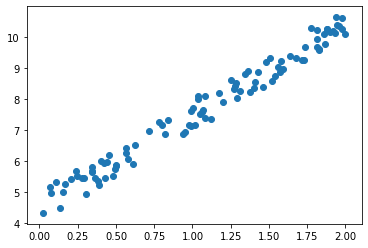

In [758]:
plt.scatter(x,y)

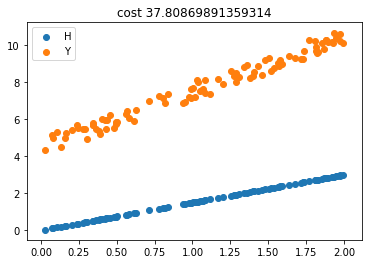

In [773]:
w = 1.5
h = w * x
cost = np.mean((h - y)**2)
plt.title('cost '+ str(cost))
plt.scatter(x, h, label='H')
plt.scatter(x, y, label='Y')
plt.legend()

#### cost = np.mean((h - y)**2)
#### cost = np.mean(((w*x + b) - y)**2)
#### cost = np.mean((w*x+b - y)**2)
### cost = (w*x +b - y)**2

### cost를 w로 미분
####  cost = f(g(x)) ,  g(x)  = w*x+b-y, f(x) = g(x)**2
####  f(g(x)) 를 x로 미분 = f' *  g(x)          * g'(x)
####                                   2 *  (w*x+b-y) * x 

### cost를 b 로 미분
####  cost = f(g(x)) ,  g(x)  = w*x+b-y, f(x) = g(x)**2
####   f' * g(x)        * g'(x) 
#####  2 * (w*x+b-y) * 1
정규방정식, 그리드서치, 경사하강법

In [3219]:
w = 100
b = 100

In [3542]:
learning_rate = 0.1
gradient_w = np.mean(2 * (w*x+b-y) * x) # 각 샘플들의 경사의 평균
gradient_b = np.mean(2 * (w*x+b-y) * 1)
w = w - learning_rate * gradient_w
b = b - learning_rate * gradient_b
w, b

(2.901079742764321, 4.579110487287256)

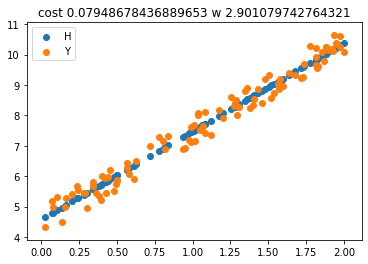

In [3543]:
h = w * x + b
cost = np.mean((h - y)**2)
plt.title('cost '+ str(cost)+' w '+ str(w))
plt.scatter(x, h, label='H')
plt.scatter(x, y, label='Y')
plt.legend()

##  2차 방정식으로 해보자

In [6429]:
x1 = 5 * np.random.rand(100, 1) / 5 # 정규화
x2 = 1 * np.random.rand(100, 1)
noize = np.random.rand(100, 1)
y = 3 * x1**2 + 2 * x2 + noize

## x1, x2, y의 관계를 방정식으로 표현하겠다
#### 비선형방정식 y = w1 * x1**2 + w2 * x2 + b

- cost : ((h - y)**2) 를 w1 으로 미분하자
  cost = (h-y)**2 , z = g(w1) = h-y=w1*x1**2+w2*x2+b, f(z) = z**2
  (2*z)*(x1**2)
- cost : ((h - y)**2) 를 w2 으로 미분하자
  (2*z)*(x2)
- cost : ((h - y)**2) 를 b 으로 미분하자
  (2*z)* 1  

In [6430]:
np.max(x1), np.max(x2)

(0.9952318254739654, 0.9822715148134251)

In [6531]:
#경사하강법: 정규화/초기값/학습률 전부를 잘 선택해야 합니다
w1 = 3.5 # 3으로 수렴
w2 = 1.5# 1로 수렴
b = 0 # 1로 수렴

In [6579]:
h = w1 * x1 **2 + w2 * x2 + b # 내가 원하는 방정식
# 코스트 함수를 핏팅하려는 파라미터로 미분하면 기울기가 나오는데
# 핏팅하려는 파라미터에서 그 기울기만큼을 빼줍니다 (학습률로 조절을 해서)
# for 문으로 x,y 하나씩 뽑아서 구현하면 SGD
cost = np.mean((h - y)**2)
learning_rate = 0.1 # 0.001 정규화를 하면 학습률이 커도 학습이 잘 됩니다.
z = h - y
w1 = w1 - learning_rate * np.mean((2*z)*(x1**2)) #모든 데이터를 사용했으므로 배치경사하강법
w2 = w2 - learning_rate * np.mean((2*z)*(x2))
b = b - learning_rate * np.mean((2*z)*(1))
cost, w1,w2,b

(0.10431016422236566,
 3.3768938298068947,
 1.4499475600796572,
 0.6114060385427817)

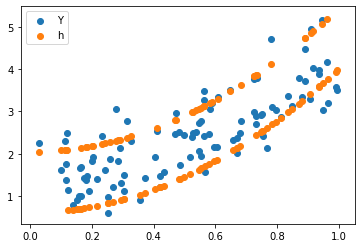

In [6577]:
plt.scatter(x1, y, label='Y')
plt.scatter(x1, h, label='h')
plt.legend()

In [6618]:
m = 100
x = 6 * np.random.rand(m,1) - 3
y = 0.5 + x**3 + x**2 + 2 + np.random.rand(m,1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures #다항식 특성
pf = PolynomialFeatures(degree=10, include_bias=False)
x_poly = pf.fit_transform(x)
x.shape, x_poly.shape, pf.get_feature_names()

In [6633]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_poly, y) #다항식이 추가된 X
model_basic = LinearRegression().fit(x, y) #원래 X

In [6634]:
np.sum( x[:,0] - x_poly[:,0] ) # 같은 값이다 

0.0

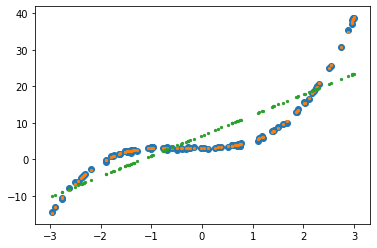

In [6635]:
plt.scatter(x, y)
plt.scatter(x, model.predict(x_poly), s=5) 
plt.scatter(x, model_basic.predict(x), s=5) 

In [6636]:
from sklearn.pipeline import Pipeline

In [6646]:
pipe = Pipeline([
    ('feature', PolynomialFeatures(degree=5, include_bias=False)),
    ('reg', LinearRegression())
])

In [6649]:
pipe.fit(x,y)
pipe.score(x,y)

0.999392547475302

In [6656]:
pipe.get_params()

{'memory': None,
 'steps': [('feature',
   PolynomialFeatures(degree=5, include_bias=False, interaction_only=False,
                      order='C')),
  ('reg',
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))],
 'verbose': False,
 'feature': PolynomialFeatures(degree=5, include_bias=False, interaction_only=False,
                    order='C'),
 'reg': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'feature__degree': 5,
 'feature__include_bias': False,
 'feature__interaction_only': False,
 'feature__order': 'C',
 'reg__copy_X': True,
 'reg__fit_intercept': True,
 'reg__n_jobs': None,
 'reg__normalize': False}